<a href="https://colab.research.google.com/github/AustinYanSebasmannAlderhaz/generative_ai/blob/main/41073125H_GenAI_HW3_Topic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#主題二：研究GAN背後原理，試著用自己的方式解釋Cross Entropy、KL divergence。

##二-1 GAN背後原理：

* GAN就是**生成器(造假者)**與**鑑別器(打假者)**互相對抗
* 透過「製造假資料的 AI」和「分辨真假資料的 AI」互相對抗，讓 AI 變得很強，最後能創造出幾乎跟真實一樣的內容

## 二-2 GAN目標函數公式：
(圖片來源：上課投影片)

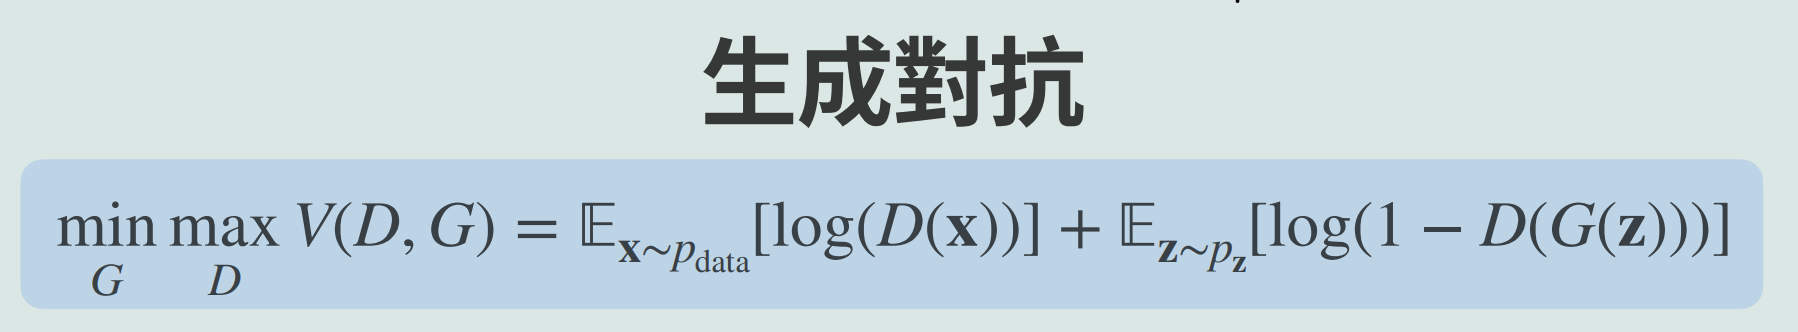

##二-3 GAN 目標函數推導
### 1.兩個網路的目標
*  生成器（Generator, G）：嘗試生成與真實數據相似的假數據。
*  鑑別器（Discriminator, D）：負責區分真數據（來自真實數據分佈$p_{data}$）和假數據（來自生成器的分佈$G(z)$）。

###2.生成器的目標
生成器G(z) 想要騙過鑑別器，也就是讓$D(G(z))$ 盡量接近 1。

所以以下這個式子生成器希望"越小越好"：
$$
E_{z\sim p_z}[\log(1 - D(G(z)))]
$$

###3.鑑別器的目標

鑑別器D(x) 的輸出是一個介於 0 到 1 之間的值，代表輸入數據為真數據的機率。
* 對於真實數據$x∼p_{data}(x)，希望D(x)$ 越接近 1。
* 對於生成的假數據$G(z)∼p_z(z)，希望D(G(z))$越接近 0

所以以下這個式子鑑別器希望"越大越好"：
$$
V(D) = E_{x\sim p_{data}}[\log D(x)] + E_{z\sim p_z}[\log(1 - D(G(z)))]
$$

###4.生成對抗的目標

$$
\min_G \max_D V(D,G) = E_{x\sim p_{data}}[\log D(x)] + E_{z\sim p_z}[\log(1 - D(G(z)))]
$$

鑑別器D(x)希望此值越大越好，但生成器G(z)希望此值越小越好，因此產生生成對抗，直到兩者平衡


### 使用ChatGPT幫我在Colab文字輸入區撰寫公式

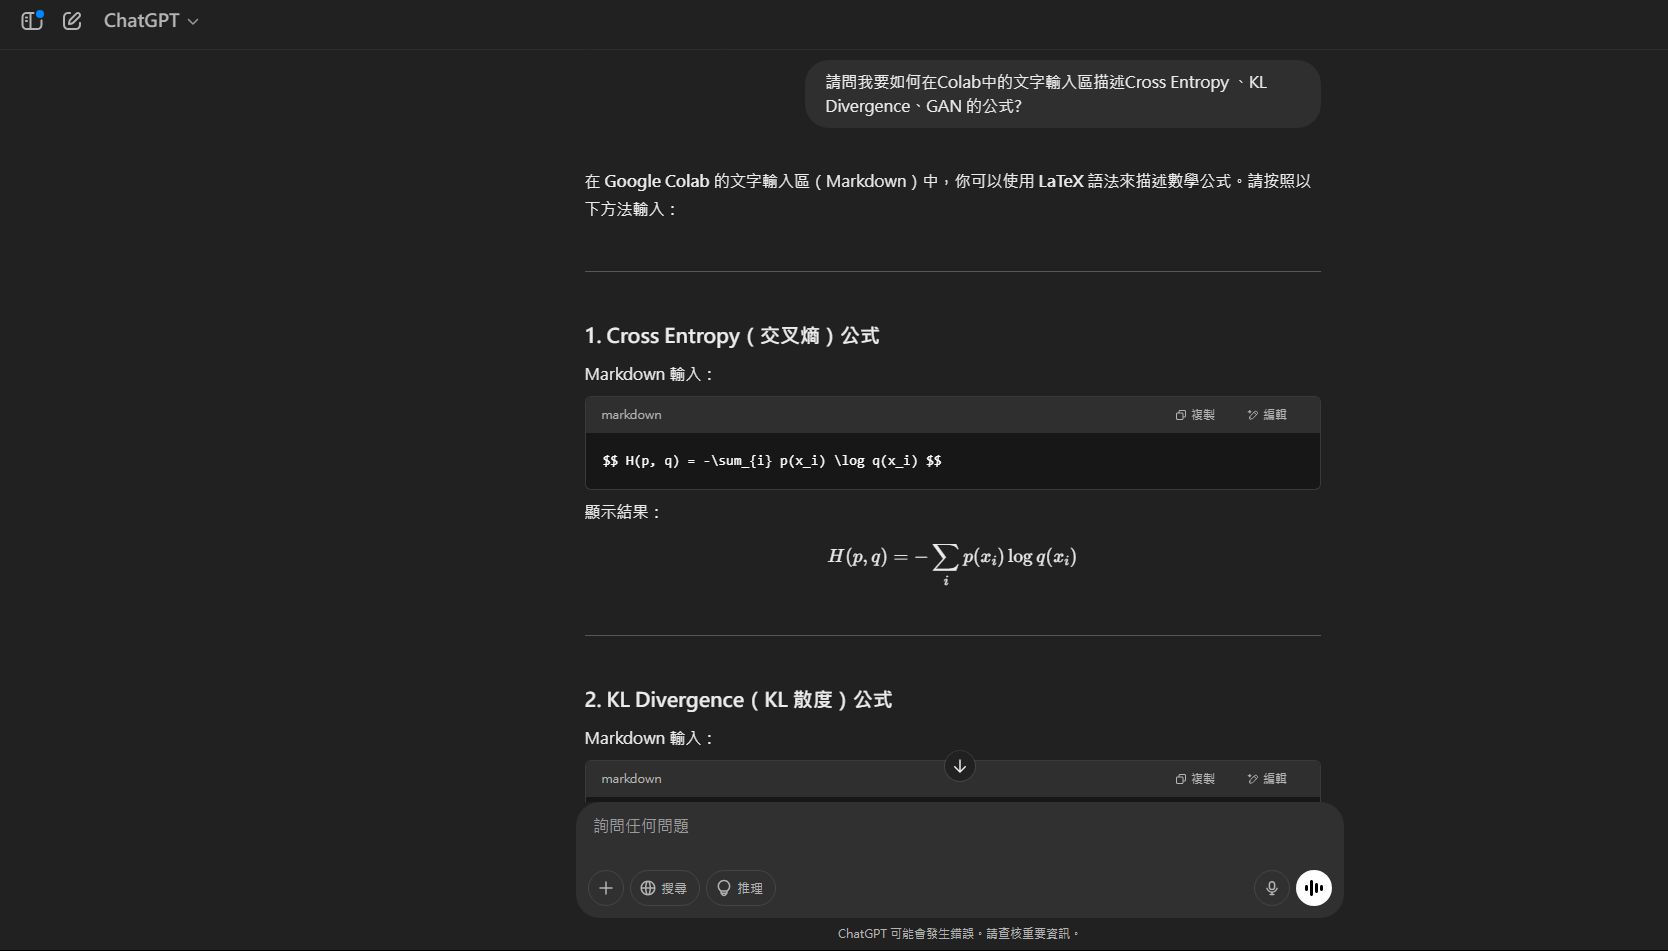

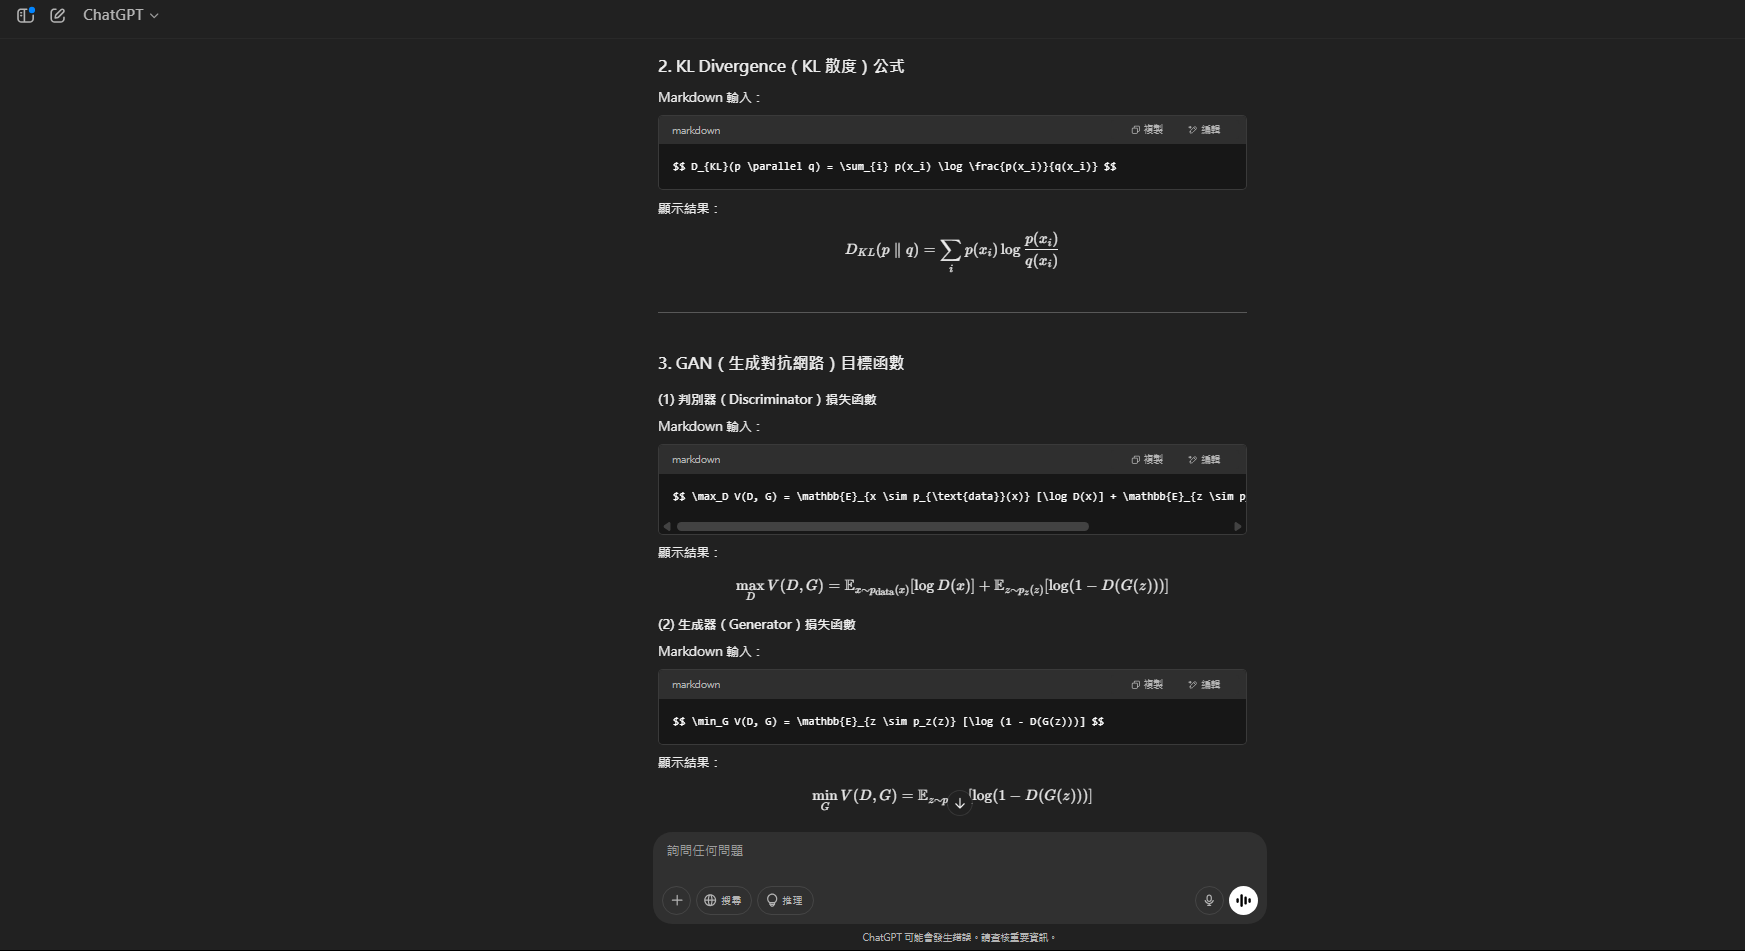

##二-4 Cross Entropy 的數學定義：

* Cross Entropy 的公式：
$$
H(p, q) = -\sum p(x) \log q(x)
$$

資料來源：https://zh.wikipedia.org/zh-tw/%E4%BA%A4%E5%8F%89%E7%86%B5

直接衡量「模型預測」與「真實分佈」的匹配程度，主要用來當作損失函數，幫助模型訓練。

##二-5 KL Divergence 的數學定義：

* KL Divergence 的公式：
$$
D_{KL}(p \parallel q) = \sum p(x) \log \frac{p(x)}{q(x)}
$$


資料來源：https://zh.wikipedia.org/zh-tw/%E7%9B%B8%E5%AF%B9%E7%86%B5

計算「模型的分佈」與「真實分佈」之間的「資訊損失」，通常用在更強調機率分佈的應用。

##二-6 手算範例

假設有兩個離散分佈p(x)和q(x)：
* p(x)：真實分佈（例如數據的實際類別機率）
* q(x)：模型預測的機率分佈

已知：

$p(x)=[0.8,0.1,0.1]$

$q_{1}(x)=[0.7,0.2,0.1]$(較接近p(x))

$q_{2}(x)=[0.4,0.4,0.2]$(較遠離p(x))

## 1. Cross Entropy 計算：

* 對於$q_{1}(x)$：

    $
    H(p,q_{1}​)=−[0.8\log0.7+0.1\log0.2+0.1\log0.1]=0.6765 (較小)
    $
* 對於$q_{2}(x)$：

    $
    H(p,q_{2}​)=−[0.8\log0.4+0.1\log0.4+0.1\log0.2]=0.9856(較大)
    $

## 2. KL Divergence 計算：

* 對於$q_{1}(x)$：

    $
    D_{KL}(p \parallel q_{1}) =0.8 \log \frac{0.8}{0.7} + 0.1 \log \frac{0.1}{0.2} + 0.1 \log \frac{0.1}{0.1}=0.0375 (較小)
    $
* 對於$q_{2}(x)$：

    $
    D_{KL}(p \parallel q_{2}) =0.8 \log \frac{0.8}{0.4} + 0.1 \log \frac{0.1}{0.4} + 0.1 \log \frac{0.1}{0.2}=0.3466    (較大)
    $

## 3. 手算結果比較：

1. ### Cross Entropy 數值較小時，模型預測較接近真實分佈

    代表$q_{1}(x)比q_{2}(x)$更接近p(x)，因為Cross Entropy衡量的是**「真實分佈p(x)期望的 -log 預測機率」**，數值越小，代表模型的預測 q(x) 越符合真實分佈 p(x)。

2. ### KL Divergence 數值較小時，預測分佈與真實分佈較接近

    代表$q_{1}(x) $與 p(x) 的距離比$q_{2}$(x) 更小，因為 KL Divergence衡量的是**「使用q(x) 來取代p(x) 時產生的額外訊息量」**，數值越大，表示 q(x) 偏離 p(x) 越多。



##二-7 程式實驗

使用ChatGPT幫我在Colab中生成實驗用的code

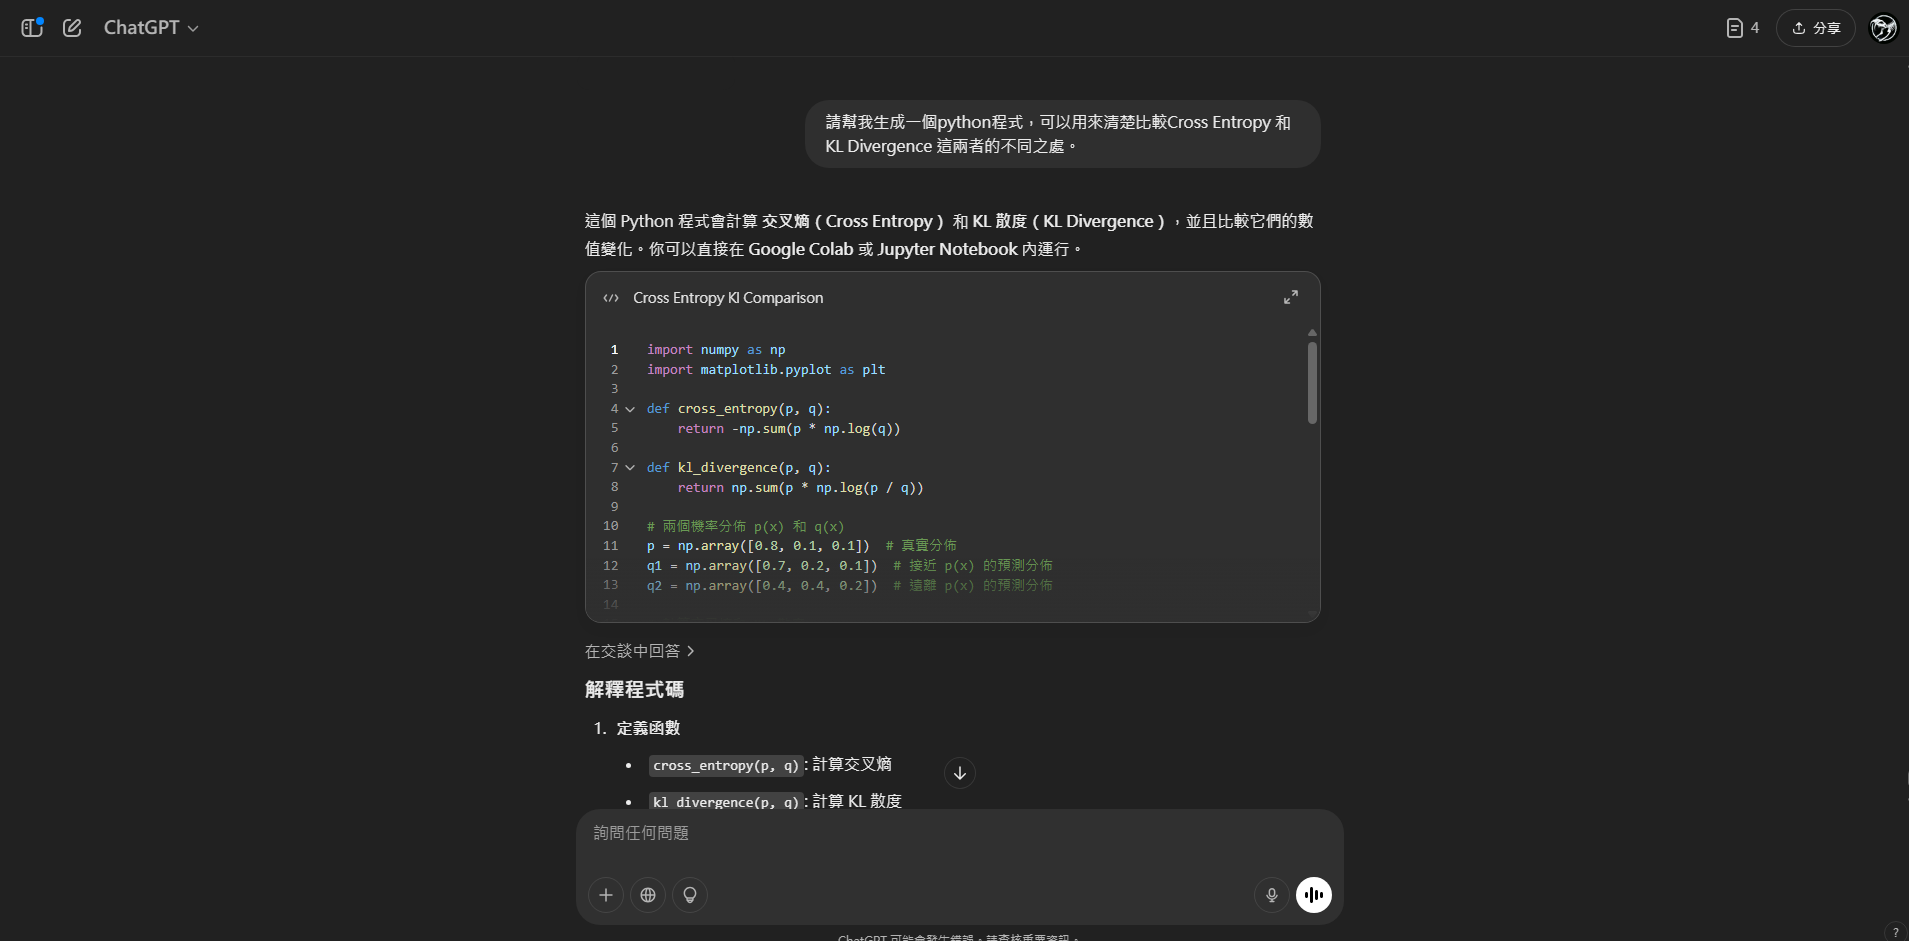

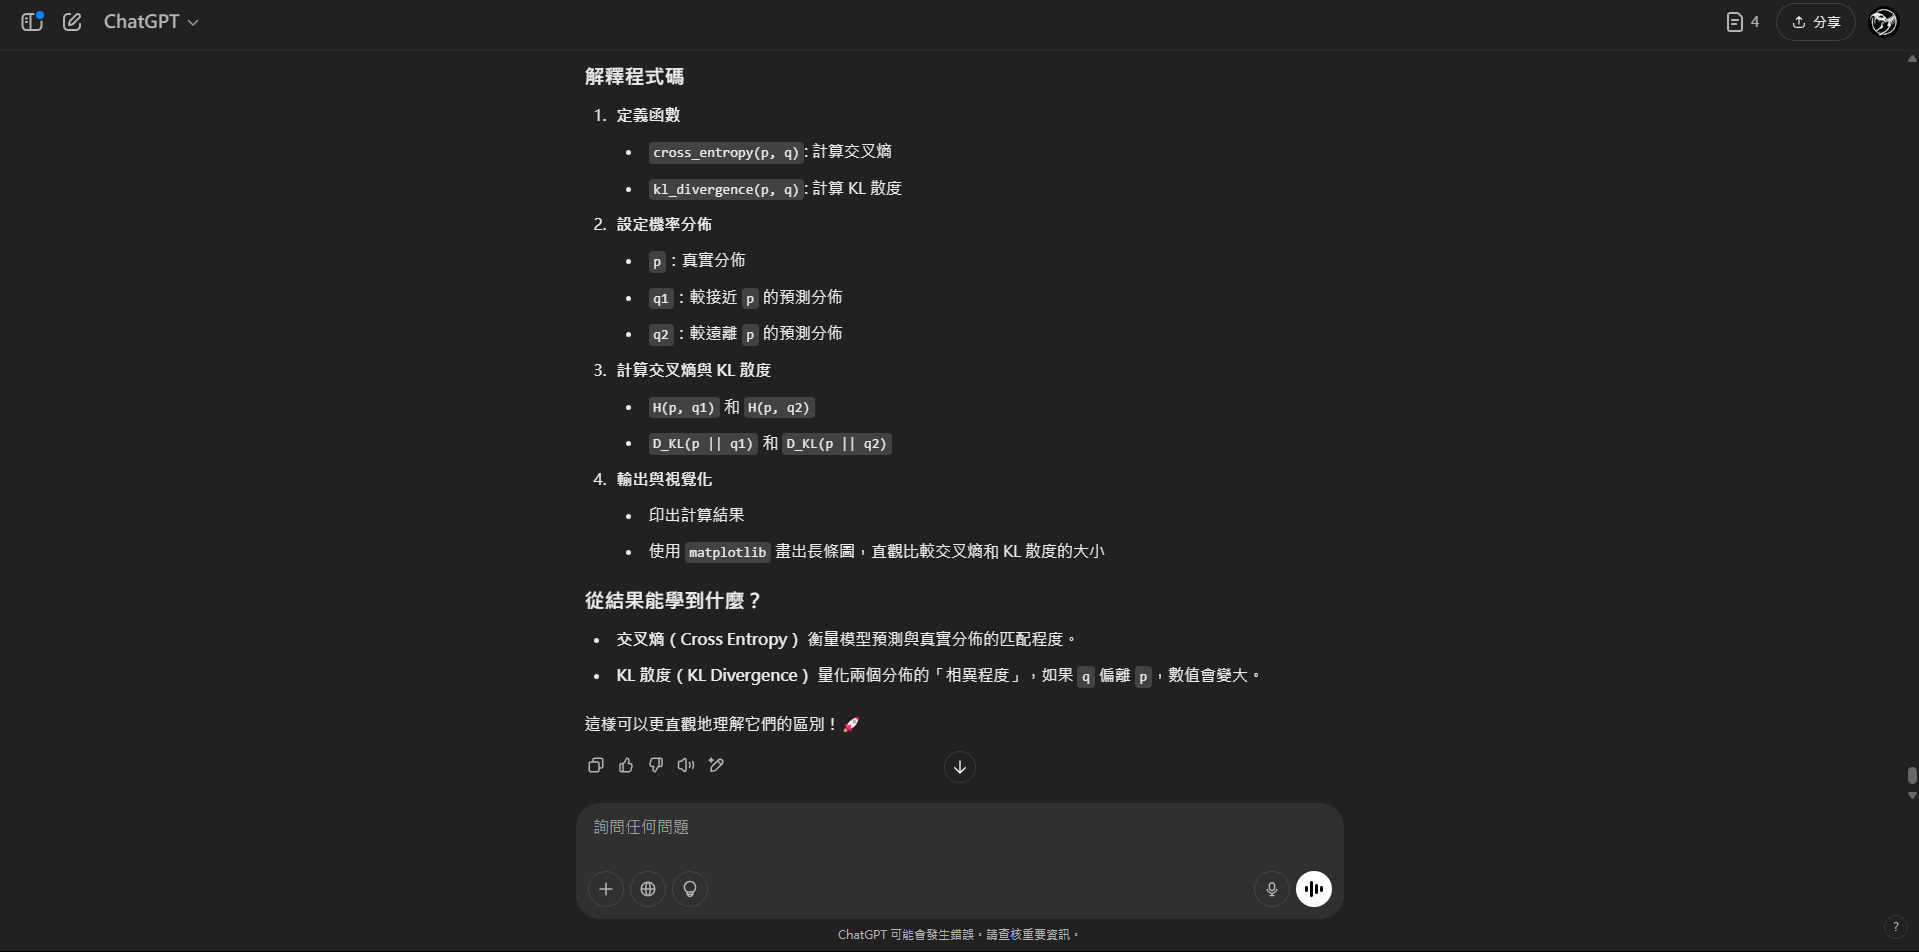

Cross Entropy H(p, q1): 0.6765
Cross Entropy H(p, q2): 1.1752
KL Divergence D_KL(p || q1): 0.0375
KL Divergence D_KL(p || q2): 0.5362


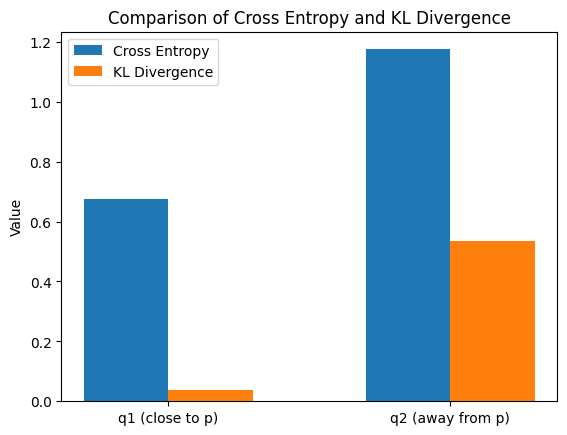

In [ ]:
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

def kl_divergence(p, q):
    return np.sum(p * np.log(p / q))

# 兩個機率分佈 p(x) 和 q(x)
p = np.array([0.8, 0.1, 0.1])  # 真實分佈
q1 = np.array([0.7, 0.2, 0.1])  # 接近 p(x) 的預測分佈
q2 = np.array([0.3, 0.3, 0.4])  # 遠離 p(x) 的預測分佈

# 計算交叉熵和 KL 散度
ce_q1 = cross_entropy(p, q1)
ce_q2 = cross_entropy(p, q2)
kl_q1 = kl_divergence(p, q1)
kl_q2 = kl_divergence(p, q2)

# 印出結果
print(f"Cross Entropy H(p, q1): {ce_q1:.4f}")
print(f"Cross Entropy H(p, q2): {ce_q2:.4f}")
print(f"KL Divergence D_KL(p || q1): {kl_q1:.4f}")
print(f"KL Divergence D_KL(p || q2): {kl_q2:.4f}")

# 視覺化結果
labels = ['q1 (close to p)', 'q2 (away from p)']
ce_values = [ce_q1, ce_q2]
kl_values = [kl_q1, kl_q2]

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ce_values, width, label='Cross Entropy')
rects2 = ax.bar(x + width/2, kl_values, width, label='KL Divergence')

ax.set_ylabel('Value')
ax.set_title('Comparison of Cross Entropy and KL Divergence')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


可以從程式輸出的圖中看到，不管是Cross Entropy 還是 KL Divergence ，q1對p的值都比q2對p的值小，因為q1比q2更接近p

##二-8 直觀解釋：

####**Cross Entropy：考試得分有多接近滿分？**

你在考試，真實分佈 p(x) 是「正確答案的機率」，而 q(x) 是「你的答案」。

* Cross Entropy就像是在衡量你的答案和標準答案的接近程度。
* 如果 q(x) 跟 p(x) 越接近，那Cross Entropy數值就越小（代表誤差小）。
* 這就是為什麼神經網路的損失函數常用Cross Entropy，它讓模型學習如何預測得更準確。

####**KL divergence：你的知識有多接近老師？**

####你是個學生，p(x) 是老師的知識，而 q(x) 是你的知識。

* KL 散度衡量「你和老師的知識差距」。
* 如果你的知識 q(x) 偏離老師的 p(x)，KL 散度數值就會變大，代表資訊損失越大。


## 二-9 使用場合


|用途|	Cross Entropy	|KL Divergence|
|----|----|----|
|神經網路訓練	| 當作損失函數	| 不適合直接當損失函數|
|機率模型學習	| 不適用	| 衡量兩個機率分佈的差異|
|分類問題	| 讓模型更準確預測類別|	 不直接使用|



* 如果要做  **神經網路訓練**    ，就用Cross Entropy（可當作損失函數，幫助模型學習）。

* 如果要比較 **兩個機率分佈的相似程度** ，就用 KL Divergence（表達資訊損失的大小）。